# 1st Project in Applied Machine Learning


> Michail Vazaios <br />
> p3170013 <br />
> Email: mich.vaz.99@gmail.com <br />

# Notes

* For some pieces of the code to run and give results you need to download some data from https://www.fec.gov/data/browse-data/?tab=bulk-data and put them in a folder named 'data' in the same directory where the .ipynb files are. 

* For some other pieces of code to run and give results you need to have a connection to the internet when you are running the code, since some files are read directly from a website.

 * First we import some modules we will need afterwards

In [1]:
import pandas as pd
import numpy as np

## Question 1

**Identify the top 5 Political Action Committees (PACs), or rather, super-PACs, that supported each of the two presidential candidates, giving the amount of money raised and spent by each one of them.** 

* We will use the information found under "Contributions from committees to candidates & independent expenditures".
* To understand what we are reading, we need to also read the separate header file.

In [2]:
pac_contr_headers_df = pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/pas2_header_file.csv')
pac_contr_headers = pac_contr_headers_df.columns.tolist()
fec_pac_contr =  pd.read_csv('data/itpas2.txt', sep="|", index_col=False, names=pac_contr_headers, parse_dates = ["TRANSACTION_DT"])
fec_pac_contr.head(5)

c:\users\michv\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10,11,12,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00548198,N,M3,G2016,15950887602,24K,CCM,BLAINE FOR CONGRESS,JEFFERSON CITY,MO,...,NaN,02102015,2500,C00458679,H8MO09153,6783511,998835,NaN,NaN,4032020151240895091
1,C00548198,N,M3,G2016,15950887602,24K,CCM,KEVIN MCCARTHY FOR CONGRESS,BAKERSFIELD,CA,...,NaN,02112015,1000,C00420935,H6CA22125,6788487,998835,NaN,NaN,4032020151240895092
2,C00235739,N,M3,P2014,15950887798,24K,CCM,DAN NEWHOUSE FOR CONGRESS,YAKIMA,WA,...,NaN,02052015,2500,C00559393,H4WA04104,B544444,998836,NaN,NaN,4032020151240895118
3,C00235739,N,M3,P2016,15950887799,24K,CCM,CATHY MCMORRIS RODGERS FOR CONGRESS,SPOKANE,WA,...,NaN,02182015,1000,C00390476,H4WA05077,B544838,998836,NaN,NaN,4032020151240895120
4,C00235739,N,M3,G2018,15950887799,24K,CCM,MANCHIN FOR WEST VIRGINIA,WASHINGTON,DC,...,NaN,02052015,1000,C00486563,S0WV00090,B544441,998836,NaN,NaN,4032020151240895121


* To be able to understand which donation goes to which candidate, we need to read the file with the candidates ('Candidate master' data) and since this file doesn't have headers we need to read the headers too (like with the previous data we read)

In [3]:
cand_headers_df = pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/cn_header_file.csv')
cand_headers = cand_headers_df.columns.tolist()
fec_cands = pd.read_csv('data/cn.txt', sep="|", index_col=False, names=cand_headers)
fec_cands.head(5)

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
0,H0AK00097,"COX, JOHN R.",REP,2014,AK,H,0.0,C,N,C00525261,P.O. BOX 1092,NaN,ANCHOR POINT,AK,99556.0
1,H0AL02087,"ROBY, MARTHA",REP,2016,AL,H,2.0,I,C,C00462143,PO BOX 195,NaN,MONTGOMERY,AL,36101.0
2,H0AL02095,"JOHN, ROBERT E JR",IND,2016,AL,H,2.0,C,N,NaN,1465 W OVERBROOK RD,NaN,MILLBROOK,AL,36054.0
3,H0AL05049,"CRAMER, ROBERT E ""BUD"" JR",DEM,2008,AL,H,5.0,NaN,P,C00239038,PO BOX 2621,NaN,HUNTSVILLE,AL,35804.0
4,H0AL05163,"BROOKS, MO",REP,2016,AL,H,5.0,I,C,C00464149,7610 FOXFIRE DRIVE,NaN,HUNTSVILLE,AL,35802.0


* Since we care only about the candidates for the presidential elections of 2016, we'll filter the information we have about the candidates.

In [4]:
fec_cands = fec_cands.loc[(fec_cands['CAND_ELECTION_YR'] == 2016) & 
                          (fec_cands['CAND_OFFICE'] == 'P') &
                          (fec_cands['CAND_STATUS'] == 'C')]

* We also need to have information about the PACs (at least the names) and not just the code of each PAC, so we will read this information as well. We will use the 'Commitee master' data. As we did before we also need to read the header file as well.

In [5]:
pac_headers_df = pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/cm_header_file.csv')
pac_headers = pac_headers_df.columns.tolist()
fec_pacs = pd.read_csv('data/cm.txt', sep="|", index_col=False, names=pac_headers)
fec_pacs.head(5)

,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
0,C00000059,HALLMARK CARDS PAC,ERIN BROWER,2501 MCGEE,MD#288,KANSAS CITY,MO,64108,U,Q,UNK,M,C,NaN,NaN
1,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,"WALKER, KEVIN","25 MASSACHUSETTS AVE, NW",SUITE 600,WASHINGTON,DC,20001,B,Q,NaN,M,M,AMERICAN MEDICAL ASSOCIATION,NaN
2,C00000489,D R I V E POLITICAL FUND CHAPTER 886,TOM RITTER,3528 W RENO,NaN,OKLAHOMA CITY,OK,73107,U,N,NaN,Q,L,TEAMSTERS LOCAL UNION 886,NaN
3,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,"C. RICHARD BONEBRAKE, M.D.",623 SW 10TH AVE,NaN,TOPEKA,KS,66612,U,Q,UNK,Q,T,NaN,NaN
4,C00000638,INDIANA STATE MEDICAL ASSOCIATION POLITICAL AC...,"VIDYA KORA, M.D.","322 CANAL WALK, CANAL LEVEL",NaN,INDIANAPOLIS,IN,46202,U,Q,NaN,Q,M,NaN,NaN


* We'll now merge the candidate information with the PAC contributions information
* And we'll merge the result of the first merging with the committee information

In [6]:
fec_pac_contr = pd.merge(fec_pac_contr,
                          fec_cands[["CAND_ID", "CAND_NAME", "CAND_PTY_AFFILIATION"]],
                          on="CAND_ID",
                          how='inner')
fec_pac_contr = pd.merge(fec_pac_contr,
                          fec_pacs[["CMTE_ID", "CMTE_NM", "CMTE_TP", "CMTE_PTY_AFFILIATION"]],
                          on=["CMTE_ID"],
                          how='inner')
print(fec_pac_contr.shape)

(120077, 27)


* Since in the first question we are interested only in the two main presidential candidates we will keep only the rows that correspond to support on either of these two candidates.

In [7]:
fec_trump_clinton = fec_pac_contr.loc[fec_pac_contr["CAND_NAME"].isin(["TRUMP, DONALD J. / MICHAEL R. PENCE ", "CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"])]
fec_trump_clinton.loc[fec_trump_clinton['CAND_NAME'] == 'TRUMP, DONALD J. / MICHAEL R. PENCE ', "CAND_NAME"] = 'TRUMP'
fec_trump_clinton.loc[fec_trump_clinton['CAND_NAME'] == 'CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE', "CAND_NAME"] = 'CLINTON'

c:\users\michv\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


* Some transactions are refounds, which we don't need to keep. So we will remove negative transactions from our dataframe.

In [8]:
fec_trump_clinton = fec_trump_clinton.loc[fec_trump_clinton["TRANSACTION_AMT"] > 0]

* Since some transactions may be against a candidate we will create a new column which will indicate the candidate each transaction favors (e.g. a transaction against Trump favors Clinton).

In [9]:
def favors(row):
    if(row["CAND_NAME"]=="CLINTON"):
        if(row["TRANSACTION_TP"] in ["24A", "24N"]):
            val = "Donald Trump"
        else:
            val = "Hillary Clinton"
    else:
        if(row["TRANSACTION_TP"] in ["24A", "24N"]):
            val = "Hillary Clinton"
        else:
            val = "Donald Trump"
    return val
fec_trump_clinton["ACTUAL_CAND"] = fec_trump_clinton.apply(favors, axis=1)

* Now we can use a `group by` to get the contributions of each PAC to the candidates. We won't take into account individual expenditures so we are adding the condition `fec_trump_clinton['ENTITY_TP'] != "IND"`.

In [10]:
top5_pacs_clinton = fec_trump_clinton[(fec_trump_clinton["ACTUAL_CAND"] == "Hillary Clinton") &
                                      (fec_trump_clinton['ENTITY_TP'] != "IND")]\
    .groupby("CMTE_NM")["TRANSACTION_AMT"].sum()\
    .sort_values(ascending=False).head(5).to_frame()

top5_pacs_trump = fec_trump_clinton[(fec_trump_clinton["ACTUAL_CAND"] == "Donald Trump") &
                                    (fec_trump_clinton['ENTITY_TP'] != "IND")]\
    .groupby("CMTE_NM")["TRANSACTION_AMT"].sum()\
    .sort_values(ascending=False).head(5).to_frame()

* And so we get the top-5 pro-Clinton (or anti-Trump) PACs:

In [11]:
top5_pacs_clinton

,TRANSACTION_AMT
CMTE_NM,
PRIORITIES USA ACTION,132494533
DNC SERVICES CORP./DEM. NAT'L COMMITTEE,22816861
OUR PRINCIPLES PAC,16353117
UNITED WE CAN,13499952
NEXTGEN CALIFORNIA ACTION COMMITTEE,13240861


* And the top-5 pro-Trump (or anti-Clinton) PACs:

In [12]:
top5_pacs_trump

,TRANSACTION_AMT
CMTE_NM,
FUTURE45,24219101
GREAT AMERICA PAC,23879421
NATIONAL RIFLE ASSOCIATION INSTITUTE FOR LEGISLATIVE ACTION,21880634
REBUILDING AMERICA NOW,21199098
REPUBLICAN NATIONAL COMMITTEE,20790780


## Comments on the results of question 1

* We can see that 2 of the top-5 pro-Trump PACs (*GREAT AMERICA PAC* and *REBUILDING AMERICA NOW*) may have some connection with the main slogan of Trump's campaign "Make America Great Again".
* We also see that a rifle Association is one of the top pro-Trump committees, which was probably a result of Trump's opposition to gun control.
* For the top-5 pro-Clinton we can't say much just by the names, but if we look at the next top pro-Clinton PACs we can see that a lot of them have names connected to policies of the Democratic party, to social groups which generally support Democrats or to groups who had no reason to support the other side(Trump). Some examples are the PACs "WOMEN VOTE!", "NEXTGEN CLIMATE ACTION COMMITTEE", "PLANNED PARENTHOOD VOTES", "AMERICAN FEDERATION OF TEACHERS", "IMMIGRANT VOTERS WIN PAC", etc.
* For both candidates the respective party's national committee is in the top supporting committees but both candidates have bigger supporting committees than their party's.

## Question 2

**Identify the top 10 individual donors (i.e., persons) for each of the two presidential candidates and the amount they spent. In order to do that, you should know that donations are not always to a fundraising committee that can be directly linked to a candidate, but they can be due to other entities such as PACs.**

* For this question we need to read the information "Contributions by individuals". As with previous cases we need to read a header file as well.
* Since the information is too much we won't read all the columns but only those we'll probably need

In [13]:
ind_headers_df = pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/indiv_header_file.csv')
ind_headers = ind_headers_df.columns.tolist()
fields = ['CMTE_ID', 'TRANSACTION_PGI', 'TRANSACTION_TP', 'ENTITY_TP', 'NAME', 'STATE', 'TRANSACTION_DT', 'TRANSACTION_AMT', 'OTHER_ID']
fec_ind =  pd.read_csv('data/itcont.txt', sep="|", index_col=False, names=ind_headers, usecols=fields)
fec_ind.head(5)

c:\users\michv\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,5,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CMTE_ID,TRANSACTION_PGI,TRANSACTION_TP,ENTITY_TP,NAME,STATE,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID
0,C00088591,P,15,IND,"BURCH, MARY K.",VA,2132015.0,500,NaN
1,C00088591,P,15,IND,"KOUNTZ, DONALD E.",VA,2132015.0,200,NaN
2,C00088591,P,15,IND,"KOUNTZ, DONALD E.",VA,2272015.0,200,NaN
3,C00088591,P,15,IND,"DOSHI, NIMISH M.",VA,2132015.0,200,NaN
4,C00088591,P,15,IND,"DOSHI, NIMISH M.",VA,2272015.0,200,NaN


* We only want to keep contributions made by individuals (`fec_ind['ENTITY_TP'] == "IND"`).
* We also don't want to take into account refounds (`fec_ind['TRANSACTION_AMT'] > 0`).

In [14]:
fec_ind = fec_ind.loc[(fec_ind['ENTITY_TP'] == "IND") &
                      (fec_ind['TRANSACTION_AMT'] > 0)]

* Here one could argue that we should also use (`fec_ind['TRANSACTION_PGI'] == "G2016"`) since we only care for the general elections of 2016 (the code indicates the election for which the contribution was made).
* However if we use the `value_counts()` method on the field `'TRANSACTION_PGI'` we notice that most of the transactions have only the letter 'P' as code for this field, which doesn't correspond to anything. The correct codes should have the format `EYYYY (election plus election year)`, where the most common options for the first letter are 'G' (reffering to General) and 'P' (reffering to Primary). Seeing so many 'P' instances of this field and noticing that there are less occurences of 'G2016' than 'P2016', we assume that possibly many people confused the 'P' for Presidential instead of Primary. So we will not add this extra condition contrary to what would seem logical by first sight.
* This conclusion was reached after doing the exercise with this condition and getting very small numbers for the top contributors.

In [15]:
fec_ind['TRANSACTION_PGI'].value_counts()

P        8819053
P2016    3904933
G2016    2833834
G2015     104843
R2015      66162
          ...   
G216           1
P1             1
C2014          1
P1200          1
S2013          1
Name: TRANSACTION_PGI, Length: 96, dtype: int64

* Since individuals don't necessarily give money only to committees directly linked to candidates, but to other entities such as PACs, we need to find for which candidate each committee/entity/organisation advocates for. We will use the field `"ACTUAL_CAND"` from the previous question to do this.

In [16]:
fec_pacs_once = fec_trump_clinton[['CMTE_ID', 'TRANSACTION_AMT', 'ACTUAL_CAND']].drop_duplicates(subset=['CMTE_ID'])
fec_pacs_once.shape

(800, 3)

* What we are doing may have the problem that if a PAC advocates for both candidates, we count it as advocating only for the first we encounter. However most PACs (at least the important ones) support only one of the two main candidates so this is not a problem. Without doing this simplification it would be very difficult to answer the question and the price we pay is not so big.
* Now we can merge the data about the individual's contributions and the information about which PAC supports which candidate.

In [17]:
ind_to_cand = pd.merge(fec_ind[['CMTE_ID', 'NAME', 'TRANSACTION_AMT', 'STATE', 'TRANSACTION_DT']],
                          fec_pacs_once[['CMTE_ID', 'ACTUAL_CAND']],
                          on="CMTE_ID",
                          how='inner')

* Now we can use a `groupby` to find the top individual supporters for each of the two main candidates

In [18]:
top_ind_trump = ind_to_cand[ind_to_cand["ACTUAL_CAND"] == "Donald Trump"]\
    .groupby("NAME")["TRANSACTION_AMT"].sum()\
    .sort_values(ascending=False).to_frame()

In [19]:
top_ind_trump.head(10)

,TRANSACTION_AMT
NAME,
"MERCER, ROBERT",15900800
"ADELSON, SHELDON",10000000
"ADELSON, MIRIAM",10000000
"HENDRICKS, DIANE",8152900
"MARCUS, BERNARD",7395800
"MCMAHON, LINDA E.",7200400
"UIHLEIN, RICHARD",6406600
"UIHLEIN, RICHARD E.",5356600
"PERLMUTTER, ISAAC",5000000


In [20]:
top_ind_clinton = ind_to_cand[ind_to_cand["ACTUAL_CAND"] == "Hillary Clinton"]\
    .groupby("NAME")["TRANSACTION_AMT"].sum()\
    .sort_values(ascending=False).to_frame()

In [21]:
top_ind_clinton.head(10)

,TRANSACTION_AMT
NAME,
"STEYER, THOMAS F.",89636000
"EYCHANER, FRED",36614700
"SUSSMAN, DONALD",24294600
"BLOOMBERG, MICHAEL R.",21673224
"SOROS, GEORGE",20729924
"MOSKOVITZ, DUSTIN",16561400
"SUSSMAN, S. DONALD",13013500
"ASSOCIATION, NATIONAL EDUCATION",12175000
"SIMONS, JAMES H.",11294300


* As we can see there are some problems with the names. Some names appear multiple times with slight differences and sometimes a couple may appear twice (one for each person in the couple). In this last situation we count the to people as one.
* To fix this we will present the top-30 individuals (before data-cleaning), try to fix the problem by hand and then present the new results.
* The individuals below the top-30 have slighter chances of affecting which people enter the top-10 so we won't give them any attention. It would also be too time consuming to do so.
* We see that there are still some corporations or committees counted as individuals. We'll fix this as well.

* First for Trump supporters:

In [22]:
top_ind_trump.head(30)

,TRANSACTION_AMT
NAME,
"MERCER, ROBERT",15900800
"ADELSON, SHELDON",10000000
"ADELSON, MIRIAM",10000000
"HENDRICKS, DIANE",8152900
"MARCUS, BERNARD",7395800
"MCMAHON, LINDA E.",7200400
"UIHLEIN, RICHARD",6406600
"UIHLEIN, RICHARD E.",5356600
"PERLMUTTER, ISAAC",5000000


In [23]:
ind_to_cand.loc[ind_to_cand['NAME'].isin(["ADELSON, SHELDON", "ADELSON, MIRIAM"]), 
                'NAME'] = "ADELSON, SHELDON AND MIRIAM"
ind_to_cand.loc[ind_to_cand['NAME'] == "HENDRICKS, DIANE MS.", 
                'NAME'] = "HENDRICKS, DIANE"
ind_to_cand.loc[ind_to_cand['NAME'] == "UIHLEIN, RICHARD E.", 
                'NAME'] = "UIHLEIN, RICHARD"
ind_to_cand.loc[ind_to_cand['NAME'] == "PALMER, GEOFFREY H", 
                'NAME'] = "PALMER, GEOFFREY H."
ind_to_cand.loc[ind_to_cand['NAME'] == "STEPHENS, WARREN A.", 
                'NAME'] = "STEPHENS, WARREN"

* And now for Clinton supporters:

In [24]:
top_ind_clinton.head(30)

,TRANSACTION_AMT
NAME,
"STEYER, THOMAS F.",89636000
"EYCHANER, FRED",36614700
"SUSSMAN, DONALD",24294600
"BLOOMBERG, MICHAEL R.",21673224
"SOROS, GEORGE",20729924
"MOSKOVITZ, DUSTIN",16561400
"SUSSMAN, S. DONALD",13013500
"ASSOCIATION, NATIONAL EDUCATION",12175000
"SIMONS, JAMES H.",11294300


In [25]:
ind_to_cand = ind_to_cand.drop(ind_to_cand[ind_to_cand['NAME'] == "ASSOCIATION, NATIONAL EDUCATION"].index)
ind_to_cand.loc[ind_to_cand['NAME'] == "SUSSMAN, S. DONALD", 
                'NAME'] = "SUSSMAN, DONALD"
ind_to_cand.loc[ind_to_cand['NAME'] == "SIMONS, JAMES H.", 
                'NAME'] = "SIMONS, JAMES"
ind_to_cand.loc[ind_to_cand['NAME'].isin(["SABAN, HAIM", "SABAN, CHERYL"]), 
                'NAME'] = "SABAN HAIM AND CHERYL"
ind_to_cand.loc[ind_to_cand['NAME'].isin(["PRITZKER, JAY ROBERT", "PRITZKER, MARY KATHRYN"]), 
                'NAME'] = "PRITZKER, MARY KATHRYN AND JAY ROBERT"
ind_to_cand.loc[ind_to_cand['NAME'].isin(["LAUFER, HENRY", "LAUFER, MARSHA Z."]), 
                'NAME'] = "LAUFER, HENRY AND MARSHA"

* And now having done the data correction we can find the real top-10 individual contributors for each candidate:

In [26]:
top_ind_trump = ind_to_cand[ind_to_cand["ACTUAL_CAND"] == "Donald Trump"]\
    .groupby("NAME")["TRANSACTION_AMT"].sum()\
    .sort_values(ascending=False).to_frame()
top_ind_trump.head(10)

,TRANSACTION_AMT
NAME,
"ADELSON, SHELDON AND MIRIAM",20000000
"MERCER, ROBERT",15900800
"HENDRICKS, DIANE",12152900
"UIHLEIN, RICHARD",11763200
"MARCUS, BERNARD",7395800
"MCMAHON, LINDA E.",7200400
"PALMER, GEOFFREY H.",6000000
"PERLMUTTER, ISAAC",5000000
"STEPHENS, WARREN",4200600


In [27]:
top_ind_clinton = ind_to_cand[ind_to_cand["ACTUAL_CAND"] == "Hillary Clinton"]\
    .groupby("NAME")["TRANSACTION_AMT"].sum()\
    .sort_values(ascending=False).to_frame()
top_ind_clinton.head(10)

,TRANSACTION_AMT
NAME,
"STEYER, THOMAS F.",89636000
"SUSSMAN, DONALD",37308100
"EYCHANER, FRED",36614700
"SIMONS, JAMES",22303080
"BLOOMBERG, MICHAEL R.",21673224
"SOROS, GEORGE",20729924
"PRITZKER, MARY KATHRYN AND JAY ROBERT",17308448
"MOSKOVITZ, DUSTIN",16561400
SABAN HAIM AND CHERYL,14041800


## Comments on the results of question 2

* We see that Clinton's top individual donors gave more money Trump's 
* As expected, most people on both lists are managers, businesspeople and billionaires

## Question 3

**Investigate the chronological evolution of the contributions made to and the expenditures made by the campaigns.**

* Contributions made to the campaigns include contributions by individuals and contributions by PACs.
* Expenditures made by the campaigns include operating expenditures and independent expenditures.
* For the operating expenditures made by the campaigns we need to read the information under "Operating expenditures":

In [28]:
oppexp_headers_df = pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/oppexp_header_file.csv')
oppexp_headers = oppexp_headers_df.columns.tolist()
fields = ["CMTE_ID", "AMNDT_IND", "RPT_YR", "NAME", "CITY", "STATE", "ZIP_CODE", 
          "TRANSACTION_DT", "TRANSACTION_AMT", "TRANSACTION_PGI", "ENTITY_TP"]
oppexp =  pd.read_csv('data/oppexp.txt', sep="|", index_col=False, names=oppexp_headers, usecols=fields, parse_dates = ["TRANSACTION_DT"])
oppexp.head(5)

c:\users\michv\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CMTE_ID,AMNDT_IND,RPT_YR,NAME,CITY,STATE,ZIP_CODE,TRANSACTION_DT,TRANSACTION_AMT,TRANSACTION_PGI,ENTITY_TP
0,C00415182,N,2015,CHASE CARDMEMBER SERVICE,WILMINGTON,DE,198865153,02/21/2015,3301.24,P2016,ORG
1,C00415182,N,2015,GOOGLE INC.,SAN FRANCISCO,CA,941390001,01/21/2015,56.42,P2016,ORG
2,C00415182,N,2015,LINKEDIN CORPORATION,MOUNTAIN VIEW,CA,94043,01/21/2015,49.95,P2016,ORG
3,C00415182,N,2015,NATIONBUILDER,LOS ANGELES,CA,900131155,01/21/2015,99.00,P2016,ORG
4,C00415182,N,2015,"NGP VAN, INC.",WASHINGTON,DC,20005,01/21/2015,2000.00,P2016,ORG


* And with the following code we find for each expenditure, the candidate it actually favors.

In [29]:
oppexp = pd.merge(oppexp, 
                          fec_pacs_once[['CMTE_ID', 'ACTUAL_CAND']],
                          on="CMTE_ID",
                          how='inner')
oppexp.sample(5)

,CMTE_ID,AMNDT_IND,RPT_YR,NAME,CITY,STATE,ZIP_CODE,TRANSACTION_DT,TRANSACTION_AMT,TRANSACTION_PGI,ENTITY_TP,ACTUAL_CAND
28159,C00326363,N,2015,"SUMMERS, JAMES",CALISTOGA,CA,94515,05/24/2015,210.00,P2016,IND,Hillary Clinton
292764,C00003418,A,2016,INFO GROUP INC,OMAHA,NE,68103,01/08/2016,5426.07,NaN,ORG,Donald Trump
89764,C00193433,N,2016,AMERICAN FLATBREAD,BURLINGTON,VT,054018411,06/21/2016,12.00,NaN,ORG,Hillary Clinton
347965,C00497420,A,2016,HSP DIRECT LLC,ASHBURN,VA,20147,08/18/2016,26.13,O2016,ORG,Donald Trump
316188,C00492140,N,2016,"LE, DAWN A.",WASHINGTON,DC,200011014,03/11/2016,2358.80,NaN,IND,Hillary Clinton


* Now convert the column `TRANSACTION_DT` to actual dates and we make a new column `TR_DT_NEW` with the first day of the month each transaction was made. This is done to help us analyze and plot the chronological evolution of the expenditures.
* The records with dates that are before the year 2015 or after the day of the elections are discarded.

In [30]:
oppexp["TRANSACTION_DT"] = pd.to_datetime(oppexp["TRANSACTION_DT"], format='%m/%d/%Y', errors='coerce')
oppexp['TR_DT_NEW'] = oppexp['TRANSACTION_DT'].values.astype('datetime64[M]')
oppexp = oppexp.drop(oppexp[(oppexp["TRANSACTION_DT"] == np.datetime64('NaT')) |
                            (oppexp["TRANSACTION_DT"] < pd.to_datetime('20150101', format='%Y%m%d')) |
                            (oppexp["TRANSACTION_DT"] > pd.to_datetime('20161108', format='%Y%m%d'))].index)

* The same is done with the information about the PACs' transactions:

In [31]:
fec_trump_clinton["TRANSACTION_DT"] = pd.to_datetime(fec_trump_clinton["TRANSACTION_DT"], format = '%m%d%Y', errors='coerce')
fec_trump_clinton['TR_DT_NEW'] = fec_trump_clinton['TRANSACTION_DT'].values.astype('datetime64[M]')
fec_trump_clinton = fec_trump_clinton.drop(fec_trump_clinton[(fec_trump_clinton["TRANSACTION_DT"] == np.datetime64('NaT')) |
                            (fec_trump_clinton["TRANSACTION_DT"] < pd.to_datetime('20150101', format='%Y%m%d')) |
                            (fec_trump_clinton["TRANSACTION_DT"] > pd.to_datetime('20161108', format='%Y%m%d'))].index)

* And about the 'Contributions by individuals' information:

In [32]:
ind_to_cand["TRANSACTION_DT"] = pd.to_datetime(ind_to_cand["TRANSACTION_DT"], format = '%m%d%Y', errors='coerce')
ind_to_cand['TR_DT_NEW'] = ind_to_cand['TRANSACTION_DT'].values.astype('datetime64[M]')
ind_to_cand = ind_to_cand.drop(ind_to_cand[(fec_ind["TRANSACTION_DT"] == np.datetime64('NaT')) |
                            (ind_to_cand["TRANSACTION_DT"] < pd.to_datetime('20150101', format='%Y%m%d')) |
                            (ind_to_cand["TRANSACTION_DT"] > pd.to_datetime('20161108', format='%Y%m%d'))].index)

c:\users\michv\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


* We now use the `concat` function to create a dataframe with all the contributions

In [33]:
all_contr = pd.concat([fec_trump_clinton[['TR_DT_NEW', 'TRANSACTION_AMT', 'STATE', 'NAME', 'ACTUAL_CAND']]\
                     .loc[~(fec_trump_clinton['TRANSACTION_TP'].isin(['24A', '24E']))],
                     ind_to_cand[['TR_DT_NEW', 'TRANSACTION_AMT', 'STATE', 'NAME', 'ACTUAL_CAND']]], 
                     ignore_index=True)

* And the same function again to create a dataframe with all the expenditures

In [34]:
all_exp = pd.concat([fec_trump_clinton[['TR_DT_NEW', 'TRANSACTION_AMT', 'STATE', 'NAME', 'ACTUAL_CAND']]\
                     .loc[fec_trump_clinton['TRANSACTION_TP'].isin(['24A', '24E'])],
                     oppexp[['TR_DT_NEW', 'TRANSACTION_AMT', 'STATE', 'NAME', 'ACTUAL_CAND']]], 
                     ignore_index=True)

* With the `groupby` function we find the contributions by month for both candidates together and for each of them separately.
* We do the same for the expenditures.

In [35]:
all_contr_by_month = all_contr\
    .groupby("TR_DT_NEW")["TRANSACTION_AMT"].sum()\
    .to_frame()
trump_contr_by_month = all_contr[all_contr["ACTUAL_CAND"] == "Donald Trump"]\
    .groupby("TR_DT_NEW")["TRANSACTION_AMT"].sum()\
    .to_frame()
clinton_contr_by_month = all_contr[all_contr["ACTUAL_CAND"] == "Hillary Clinton"]\
    .groupby("TR_DT_NEW")["TRANSACTION_AMT"].sum()\
    .to_frame()
all_exp_by_month = all_exp\
    .groupby("TR_DT_NEW")["TRANSACTION_AMT"].sum()\
    .to_frame()
trump_exp_by_month = all_exp[all_exp["ACTUAL_CAND"] == "Donald Trump"]\
    .groupby("TR_DT_NEW")["TRANSACTION_AMT"].sum()\
    .to_frame()
clinton_exp_by_month = all_exp[all_exp["ACTUAL_CAND"] == "Hillary Clinton"]\
    .groupby("TR_DT_NEW")["TRANSACTION_AMT"].sum()\
    .to_frame()

* We `merge` the information obtained above with a dataframe containing all the month-starting dates for the period we are interested in. We do this to avoid having no data for some months.

In [36]:
all_starts_of_month = pd.date_range(start='2015-01-05', end='2016-11-07', freq='MS').to_frame()
all_starts_of_month.columns = ["TR_DT_NEW"]
# All contributions
all_contr_by_month = pd.merge(all_contr_by_month['TRANSACTION_AMT'], 
                             all_starts_of_month['TR_DT_NEW'],
                             how='right',
                             on="TR_DT_NEW").fillna(0).sort_values(by=["TR_DT_NEW"])
# Contributions for Trump
trump_contr_by_month = pd.merge(trump_contr_by_month['TRANSACTION_AMT'], 
                             all_starts_of_month['TR_DT_NEW'],
                             how='right',
                             on="TR_DT_NEW").fillna(0).sort_values(by=["TR_DT_NEW"])
# Contributions for Clinton
clinton_contr_by_month = pd.merge(clinton_contr_by_month['TRANSACTION_AMT'], 
                             all_starts_of_month['TR_DT_NEW'],
                             how='right',
                             on="TR_DT_NEW").fillna(0).sort_values(by=["TR_DT_NEW"])
# All expenditures
all_exp_by_month = pd.merge(all_exp_by_month['TRANSACTION_AMT'], 
                             all_starts_of_month['TR_DT_NEW'],
                             how='right',
                             on="TR_DT_NEW").fillna(0).sort_values(by=["TR_DT_NEW"])
# Expenditures for Trump
trump_exp_by_month = pd.merge(trump_exp_by_month['TRANSACTION_AMT'], 
                             all_starts_of_month['TR_DT_NEW'],
                             how='right',
                             on="TR_DT_NEW").fillna(0).sort_values(by=["TR_DT_NEW"])
# Expenditures for Clinton
clinton_exp_by_month = pd.merge(clinton_exp_by_month['TRANSACTION_AMT'], 
                             all_starts_of_month['TR_DT_NEW'],
                             how='right',
                             on="TR_DT_NEW").fillna(0).sort_values(by=["TR_DT_NEW"])

* And now we plot the contributions and the expenditures by month. Here we plot the total contributions and expenditures (that means the sum of the ammounts fot the two candidates' campaigns)

Text(0.5, 1.0, 'Chronological evolution of campaign expenditures')

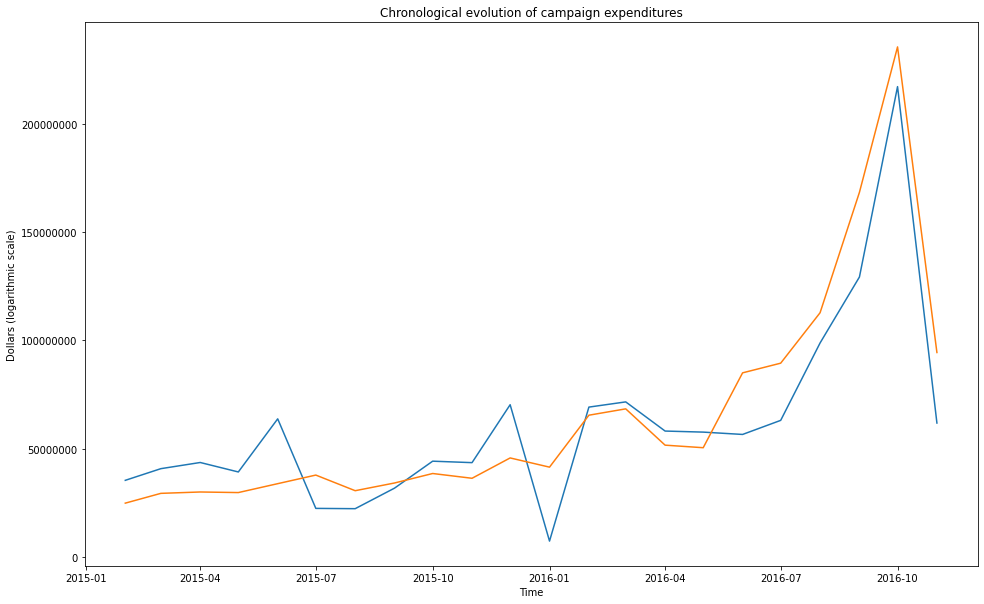

In [37]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(16, 10))
plt.ticklabel_format(style = 'plain')
plt.plot(all_contr_by_month['TR_DT_NEW'], all_contr_by_month['TRANSACTION_AMT'], label = 'All contributions to campaigns')
plt.plot(all_exp_by_month['TR_DT_NEW'], all_exp_by_month['TRANSACTION_AMT'], label = 'All campaign expenditures')
plt.xlabel('Time')
plt.ylabel('Dollars (logarithmic scale)')

plt.title("Chronological evolution of campaign expenditures")


* We now do the same but by candidate. Blue is used for Clinton and red for Trump since these are the colors of the Democrats and the Republicans respectively.

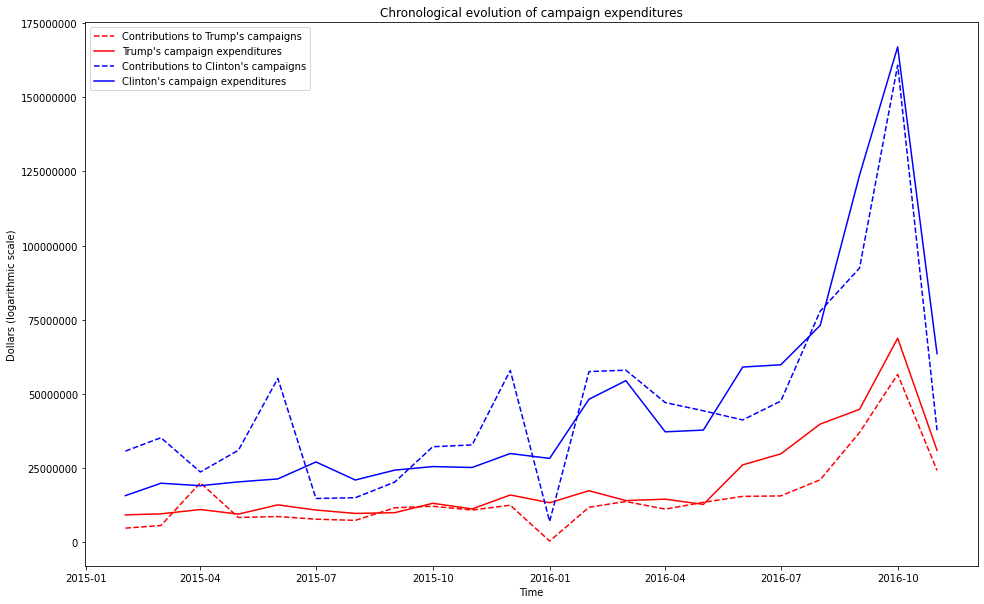

In [38]:
plt.figure(figsize=(16, 10))
plt.ticklabel_format(style = 'plain')
plt.plot(trump_contr_by_month['TR_DT_NEW'], trump_contr_by_month['TRANSACTION_AMT'], 
         label = 'Contributions to Trump\'s campaigns', color='r', linestyle='dashed')
plt.plot(trump_exp_by_month['TR_DT_NEW'], trump_exp_by_month['TRANSACTION_AMT'], 
         label = 'Trump\'s campaign expenditures', color='r')
plt.plot(clinton_contr_by_month['TR_DT_NEW'], clinton_contr_by_month['TRANSACTION_AMT'], 
         label = 'Contributions to Clinton\'s campaigns', color='b', linestyle='dashed')
plt.plot(clinton_exp_by_month['TR_DT_NEW'], clinton_exp_by_month['TRANSACTION_AMT'], 
         label = 'Clinton\'s campaign expenditures', color='b')
plt.xlabel('Time')
plt.ylabel('Dollars (logarithmic scale)')

plt.title("Chronological evolution of campaign expenditures")

plt.legend()

## Comments on the results of question 3

* We can in the diagrams that the expenditures made by and contributions made to the campaigns increased the time before the election.
* We can also see that Clinton's campaign received more contributions and made more expenditures than Trump's.
* The contributions and expenditures in the diagram appear to be falling at November. That is because the days of Novemeber before the elections were only 7 which is very little compared to the about 30 days the other months have.

## Question 4

**Identify the biggest recipients of campaign expenditures.**

* The contributions of the campaigns' money to people/corporations (not to other PACs/other committees) are mostly either from independent expenditures or operating expenditures. We will find the top recipients for each kind of expenditures and merge them in a way that sums the two kinds of expenditures if the recipient is the same.
* First we find the recipients for independent expenditures (transaction types "24A" and "24E" are for independent expenditures as one can see [here](https://www.fec.gov/campaign-finance-data/transaction-type-code-descriptions/)):

In [39]:
top_receivers = all_exp.groupby("NAME")["TRANSACTION_AMT"].sum().sort_values(ascending=False).to_frame()
top_receivers.head(10)

,TRANSACTION_AMT
NAME,
TARGETED PLATFORM MEDIA LLC,1.005688e+08
AMERICAN EXPRESS,3.084654e+07
BULLY PULPIT INTERACTIVE LLC,2.789344e+07
PRECISION NETWORK LLC,2.567816e+07
COMMUNICATIONS CORPORATION OF AMERICA,2.549641e+07
"ADP, INC.",2.025903e+07
MULTI MEDIA SERVICES CORPORATION,1.898062e+07
DEL CIELO MEDIA,1.782500e+07
RWT PRODUCTION LLC,1.631507e+07


* We see that a committee appears. We don't want committees as final top-recipients so we will remove it manually. We will later do the same for the top-recipients of money from Trump's campaign.
* We do this and we find the top-10 final recipients.
* We also convert the ammounts received by each one of them to an int to be able to read them better.

In [40]:
top_receivers.drop("REPUBLICAN NATIONAL COMMITTEE", inplace=True)
top_receivers.rename(columns={'TRANSACTION_AMT': 'Ammount received'}, inplace=True)
top_receivers['Ammount received'] = top_receivers['Ammount received'].astype(int)
top_receivers.head(10)

,Ammount received
NAME,
TARGETED PLATFORM MEDIA LLC,100568756
AMERICAN EXPRESS,30846541
BULLY PULPIT INTERACTIVE LLC,27893444
PRECISION NETWORK LLC,25678160
COMMUNICATIONS CORPORATION OF AMERICA,25496410
"ADP, INC.",20259032
MULTI MEDIA SERVICES CORPORATION,18980619
DEL CIELO MEDIA,17825000
RWT PRODUCTION LLC,16315067


* Similarly we will use a group by to find the top recipients of money from Clinton's campaign:

In [41]:
top_receivers_clinton = all_exp[all_exp['ACTUAL_CAND'] == 'Hillary Clinton']\
                                .groupby("NAME")["TRANSACTION_AMT"].sum()\
                                .sort_values(ascending=False).to_frame()
top_receivers_clinton.rename(columns={'TRANSACTION_AMT': 'Ammount received'}, inplace=True)
top_receivers_clinton['Ammount received'] = top_receivers_clinton['Ammount received'].astype(int)
top_receivers_clinton.head(10)

,Ammount received
NAME,
TARGETED PLATFORM MEDIA LLC,100568756
BULLY PULPIT INTERACTIVE LLC,27893444
PRECISION NETWORK LLC,25678160
"ADP, INC.",20259032
AMERICAN EXPRESS,17423139
RWT PRODUCTION LLC,16315067
"TERRA STRATEGIES, LLC",14934261
NEXUS DIRECT,14105683
BLUEWEST MEDIA,12565123


* And now for the top recipients from Trump's campaign:

In [42]:
top_receivers_trump = all_exp[all_exp['ACTUAL_CAND'] == 'Donald Trump']\
                                .groupby("NAME")["TRANSACTION_AMT"].sum()\
                                .sort_values(ascending=False).to_frame()
top_receivers_trump.drop("REPUBLICAN NATIONAL COMMITTEE", inplace=True)
top_receivers_trump.rename(columns={'TRANSACTION_AMT': 'Ammount received'}, inplace=True)
top_receivers_trump['Ammount received'] = top_receivers_trump['Ammount received'].astype(int)
top_receivers_trump.head(10)

,Ammount received
NAME,
COMMUNICATIONS CORPORATION OF AMERICA,25496410
MULTI MEDIA SERVICES CORPORATION,18980619
DEL CIELO MEDIA,17825000
STARBOARD STRATEGIC,13842906
AMERICAN EXPRESS,13423402
INTERNAL REVENUE SERVICE,10463223
FLS CONNECT LLC,9043105
SOUTHWEST PUBLISHING AND MAILING CORPORATION,8975782
"STARBOARD STRATEGIC, INC.",8936541


## Comments on the results of question 4

* We see that the top receipients of money from Clinton's campaign generally get more money. This is not strange if we think that her campaign had more expenditures than Trump's  in total.
* Many of the top recipients for both campaigns are network/communications/campaign companies, which was to be expected since campaigns are essentially marketing (so they need to reach a lot of people to get the wanted results).
* Most of the top receipients are either on Trump's or Clinton's side, having income almost exclusively from one of the two campaigns. The only exception to this rule is "American Express" which appears to be taking money from both opposing sides.

## Question 5

**Examine the geographical distribution, at the state level, of campaign expenditures. For each state, calculate the expenditures per voter. This will require that you find a source with the number of registered voters per state. Examine the situation for swing states.**

* For this question we need to get the number of eligible voters per state. We downloaded the .csv file that we found [here](http://www.electproject.org/2016g), put it in the data folder and read it with pandas

In [43]:
voters_by_state = pd.read_csv('data/eligible_voters.csv', sep=",", index_col=False)
voters_by_state.head(5)

,State,Unnamed: 1,Unnamed: 2,Turnout Rates,Unnamed: 4,Unnamed: 5,Numerators,Unnamed: 7,Denominators,Unnamed: 9,VEP Components (Modifications to VAP to Calculate VEP),Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,State Results Website,Status,VEP Total Ballots Counted,VEP Highest Office,VAP Highest Office,Total Ballots Counted (Estimate),Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
1,United States,NaN,NaN,60.1%,59.2%,54.7%,"138,846,571","136,753,936","230,931,921","250,055,734",8.3%,"1,416,810","2,198,907","506,297","3,176,484","4,739,596",NaN
2,Alabama,http://www.alabamavotes.gov/downloads/election...,Official,59.1%,58.8%,56.3%,"2,134,061","2,123,372","3,609,447","3,770,142",2.5%,"28,680","52,177","8,562","66,983",NaN,AL
3,Alaska,http://www.elections.alaska.gov/results/16GENR/,Official,61.5%,61.0%,57.4%,"321,271","318,608","522,679","555,367",4.1%,"4,317","6,621","1,812","9,903",NaN,AK
4,Arizona,http://apps.azsos.gov/election/2016/General/Of...,Official,56.1%,54.9%,48.9%,"2,661,497","2,604,657","4,740,310","5,331,034",9.4%,"37,582","77,373","7,500","89,185",NaN,AZ


* We see that there are some problems with the dataframe and that there are many columns we don't need. To fix this we read the file again (it's small so this isn't a problem), drop some rows, rename the columns to easier-to-remember names and add a column with the code of each state.

In [44]:
fields = ["State", "Denominators","Unnamed: 16"]
voters_by_state = pd.read_csv('data/eligible_voters.csv', sep=",", index_col=False, usecols=fields)
voters_by_state.drop(voters_by_state.tail(1).index,inplace=True)
voters_by_state.drop(voters_by_state.head(1).index,inplace=True)
voters_by_state = voters_by_state.rename(columns={"Denominators": "Voters", "Unnamed: 16": "Code"})
voters_by_state.loc[voters_by_state['State'] == 'United States', ['Code']] = 'USA'
voters_by_state.head(5)

,State,Voters,Code
1,United States,"230,931,921",USA
2,Alabama,"3,609,447",AL
3,Alaska,"522,679",AK
4,Arizona,"4,740,310",AZ
5,Arkansas,"2,140,097",AR


* We use a `groupby` to get the expanditures by state. We also use a `merge` with the `voters_by_state` dataframe to ensure we get rid of invalid state codes and to have all the data we'll need in a single dataframe.

In [45]:
exp_by_state = all_exp[all_exp['STATE'].isin(voters_by_state["Code"].tolist())]\
                       .groupby("STATE")["TRANSACTION_AMT"].sum()\
                       .sort_values(ascending=False).to_frame()
exp_by_state.rename(columns={"TRANSACTION_AMT": "State total"}, inplace=True)
exp_by_state = pd.merge(exp_by_state,
                        voters_by_state,
                        left_index=True,
                        right_on="Code",
                        how='inner')

* We create a new column with the expenditures per voter for each state. Before doing this we need to change the type of the `Voters` column which up to now was 'string' because of the commas in the numbers.

In [46]:
exp_by_state["Voters"] = exp_by_state["Voters"].str.replace(',', '').astype(float)
exp_by_state["per_voter"] = exp_by_state["State total"] / exp_by_state["Voters"]
exp_by_state.sort_values(by='per_voter', ascending=False, inplace=True)
exp_by_state.head(5).append(exp_by_state.tail(5))

,State total,State,Voters,Code,per_voter
10,3.762136e+08,District of Columbia,515248.0,DC,730.160327
22,1.764768e+08,Maryland,4189616.0,MD,42.122421
48,2.338384e+08,Virginia,6027152.0,VA,38.797503
9,8.985659e+06,Delaware,691720.0,DE,12.990313
17,2.439773e+07,Iowa,2288536.0,IA,10.660847
28,2.885658e+05,Montana,804250.0,MT,0.358801
38,7.084789e+05,Oklahoma,2778219.0,OK,0.255012
36,9.352303e+04,North Dakota,566783.0,ND,0.165007
14,1.552689e+05,Idaho,1166706.0,ID,0.133083
13,5.782868e+04,Hawaii,1012860.0,HI,0.057094


* By sorting the data by the expenditures per voter we can notice that there are some outliers.
* The 'District of Columbia' is an outlier and a possible explanation is that some of the expenditures either didn't have state so they were registered in the capital or that many companies have their headquarters in the capital so the expenditures were registered there.
* We will consider Maryland and Virginia outliers as well because the expenditures in these areas are unexpectedly higher than in other areas. One could argue that only the 'District of Columbia' should considered outlier and not the other two states, but there is not an absolutely correct answer.
* So we are deleting the outlier states.

In [47]:
exp_by_state = exp_by_state[~(exp_by_state['Code'].isin(['DC', 'MD', 'VA']))]

* We will now examine the relationship between the expenditures per voter and whether a state is swing state or not.
* To do this we must first find which are the swing states. There are many different opinions on the internet about which states are swing states. However most of these opinions agree in most of their items. We chose the states listed in [this](https://www.politico.com/blogs/swing-states-2016-election/2016/06/what-are-the-swing-states-in-2016-list-224327) article

In [48]:
swing_states = ['Colorado', 'Florida', 'Iowa', 'Michigan', 'Nevada', 'New Hampshire', 'North Carolina', 
                'Ohio', 'Pennsylvania', 'Virginia', 'Wisconsin']
# swing_exp = all_exp_by_state['per_voter'].loc[all_exp_by_state['State'].isin(swing_states)]

* To make our life easier we'll now add a column `state_type` to the `exp_by_state` dataframe that specifies whether a state is a swing state or not. The values in this column are either 'swing' or 'non-swing'.

In [49]:
exp_by_state['state_type'] = np.where(exp_by_state['State'].isin(swing_states), 'swing', 'non-swing')

* And now we can use a group by to get the average expenditures per voter in the different kinds of states(swing and non-swing)

In [50]:
mean_by_type_state_level = exp_by_state.groupby("state_type")["per_voter"].mean().to_frame()
mean_by_type_state_level.rename(columns={"per_voter":"Campaign expenditures per voter"}, inplace=True)
mean_by_type_state_level

,Campaign expenditures per voter
state_type,
non-swing,2.477513
swing,4.094411


* Generally this way of calculating the mean expenditures per voter for swing and non-swing states has the problem that each state 'counts' the same independently of its population. Generally this shouldn't be done because this way we get a strange king of 'mean' that is not actually the mean expenditures per voter (for the two categories of states).
* Here however it is not all that wrong because the smaller states don't count to the elections proportionately to their population. For example Alaska had 522679 eligible voters and 3 electoral votes and Kansas 2054025 eligible voters (almost 4 times more) but only 6 electoral votes (2 times more).
* To calculate the actual means we need to calculate the total voters in swing states, the total voters in non-swing states, the total expenditures in swing states and the total expenditures in non-swing states and then to make two divisions.

In [51]:
mean_swing = exp_by_state['State total'].loc[exp_by_state['state_type']=='swing'].sum()/exp_by_state['Voters'].loc[exp_by_state['state_type']=='swing'].sum()
mean_non_swing = exp_by_state['State total'].loc[exp_by_state['state_type']=='non-swing'].sum()/exp_by_state['Voters'].loc[exp_by_state['state_type']=='non-swing'].sum()

In [52]:
mean_swing

3.6371549427045844

In [53]:
mean_non_swing

2.971971417780239

* As expected we see the expenditures per voter are more in swing states (with either way of doing the calculation)

Text(28.695234736689812, 0.5, 'States')

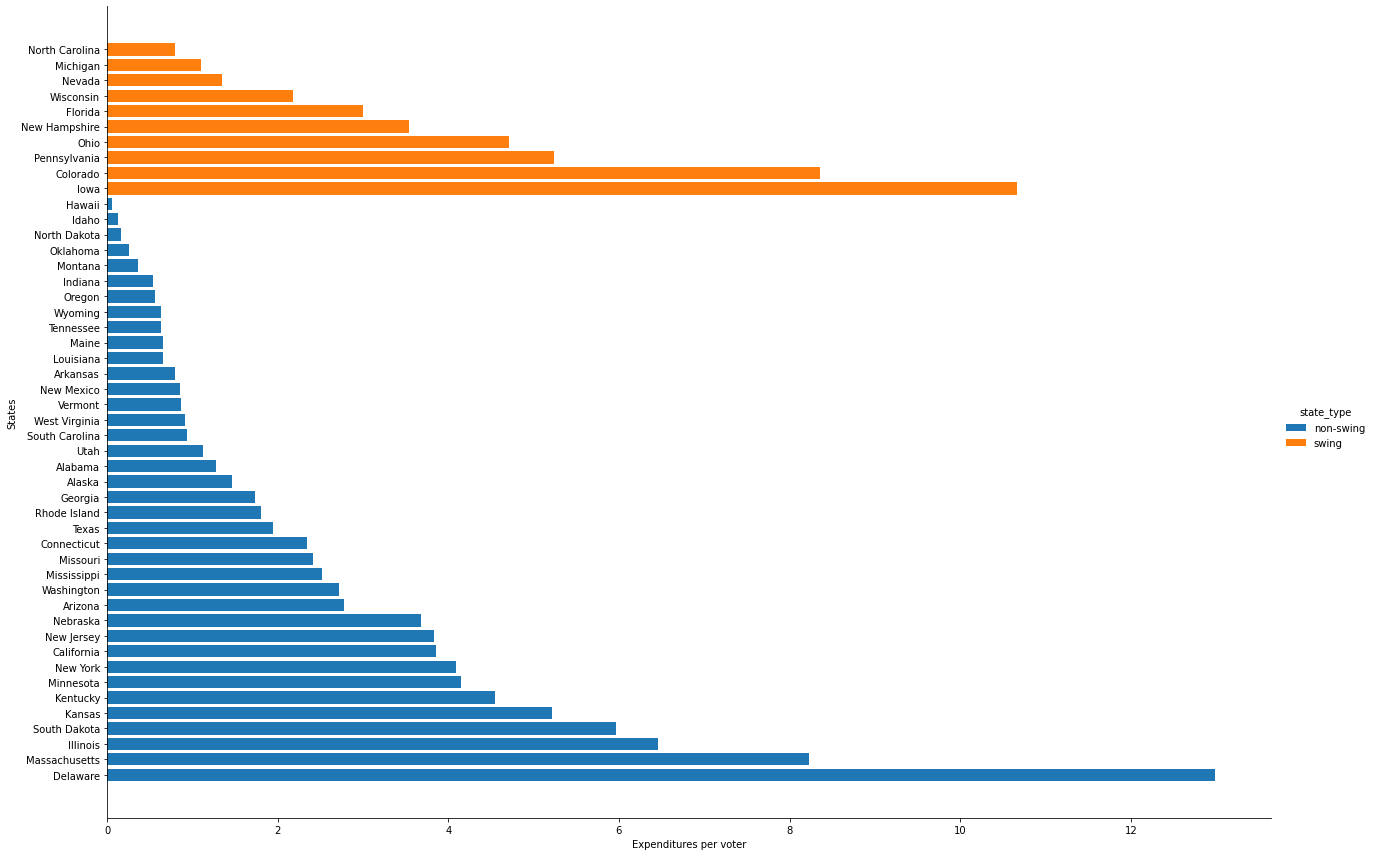

In [54]:
import seaborn
to_plot = exp_by_state[['State', 'per_voter', 'state_type']]
fg = seaborn.FacetGrid(data=to_plot, hue='state_type', height=12, aspect=1.5)
fg.map(plt.barh, 'State', 'per_voter').add_legend()
plt.xlabel('Expenditures per voter')
plt.ylabel('States')

* The difference between swing states and non-swing states is visible in the diagram but it doesn't seem so big as the means we calculated indicate

* We will now examine the expenditures not per voters but per electoral votes each state has, while making again a distinction between swing and non-swing states.
* To do this we need to know how many electoral votes each state has. We will read this information from the file 'electors_by_state.txt' in the data folder. This file can be found [here](https://drive.google.com/drive/folders/1VXcVMTf5PFSqmtCxwdvSiLdARvfVAfCG?usp=sharing) and is the result of copy-pasting and editing by hand and by 'find and replace all' in a text editor. This is generally a bad practice, but for small and simple files such as this one it can be less time-consuming than using more complex techniques.

In [55]:
elec_by_state =  pd.read_csv('data/electors_by_state.txt', sep=",", index_col=False)
elec_by_state.head(5)

,state,number of votes
0,Alabama,9
1,Kentucky,8
2,North Dakota,3
3,Alaska,3
4,Louisiana,8


* We add a new column with the expenditures per electoral vote:

In [56]:
elec_by_state.rename(columns={'state':'State', 'number of votes':'electors'}, inplace=True)
exp_by_state = pd.merge(exp_by_state,
                        elec_by_state,
                        on='State',
                        how='inner')
exp_by_state["per_elector"] = exp_by_state["State total"] / exp_by_state["electors"]
exp_by_state.sort_values(by='per_elector', ascending=False, inplace=True)
exp_by_state.head(5)

,State total,State,Voters,Code,per_voter,state_type,electors,per_elector
1,2.439773e+07,Iowa,2288536.0,IA,10.660847,swing,6,4.066289e+06
3,4.068914e+07,Massachusetts,4948028.0,MA,8.223303,non-swing,11,3.699012e+06
2,3.322340e+07,Colorado,3974405.0,CO,8.359340,swing,9,3.691489e+06
0,8.985659e+06,Delaware,691720.0,DE,12.990313,non-swing,3,2.995220e+06
4,5.805748e+07,Illinois,8985443.0,IL,6.461282,non-swing,20,2.902874e+06


* And as we did before we calculate the two different kinds of means.

In [57]:
mean_by_type_state_level = exp_by_state.groupby("state_type")["per_elector"].mean().to_frame()
mean_by_type_state_level.rename(columns={"per_elector":"Campaign expenditures per elector"}, inplace=True)
mean_by_type_state_level

,Campaign expenditures per elector
state_type,
non-swing,8.881385e+05
swing,1.729608e+06


In [58]:
mean_swing = exp_by_state['State total'].loc[exp_by_state['state_type']=='swing'].sum()/exp_by_state['electors'].loc[exp_by_state['state_type']=='swing'].sum()
mean_non_swing = exp_by_state['State total'].loc[exp_by_state['state_type']=='non-swing'].sum()/exp_by_state['electors'].loc[exp_by_state['state_type']=='non-swing'].sum()

In [59]:
mean_swing

1677864.8890977453

In [60]:
mean_non_swing

1210147.341530358

* And we plot this information as well:

Text(29.22894422743056, 0.5, 'States')

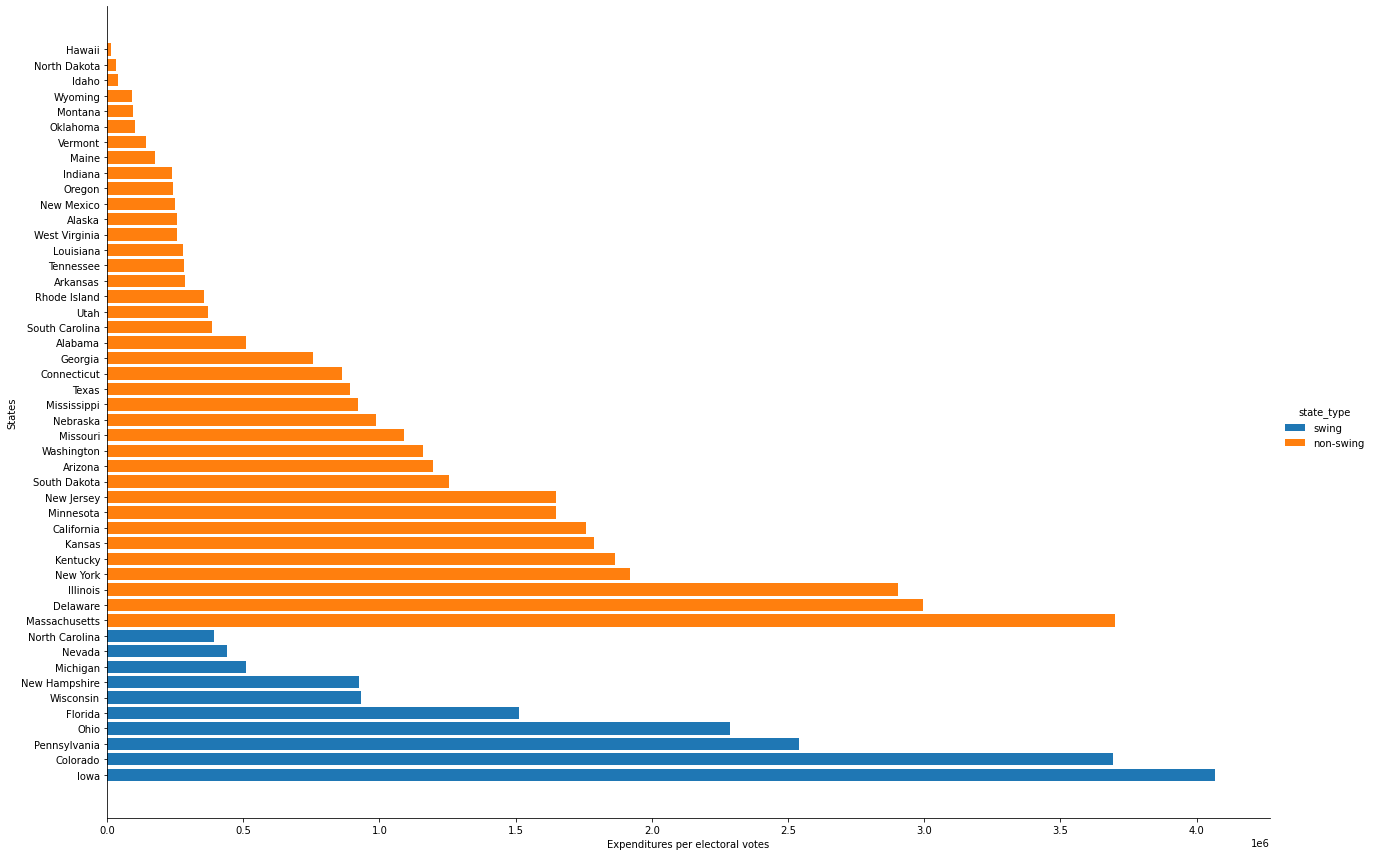

In [61]:
to_plot = exp_by_state[['State', 'per_elector', 'state_type']]
fg = seaborn.FacetGrid(data=to_plot, hue='state_type', height=12, aspect=1.5)
fg.map(plt.barh, 'State', 'per_elector').add_legend()
plt.xlabel('Expenditures per electoral votes')
plt.ylabel('States')

* As with expenditures per voter the difference is visible between swing and non-swing states, but now it doesn't seem so important as the numbers said.
* So actually there was no big difference in expenditures per voters vs expenditures per electors.

* We will now take a look at the situation for each of the two main candidates' campaign.
* First for Trump:

In [62]:
exp_by_state_trump = all_exp[(all_exp['STATE'].isin(voters_by_state["Code"].tolist())) & 
                       (all_exp['ACTUAL_CAND']=='Donald Trump')]\
                       .groupby("STATE")["TRANSACTION_AMT"].sum()\
                       .sort_values(ascending=False).to_frame()
exp_by_state_trump.rename(columns={"TRANSACTION_AMT": "State total"}, inplace=True)
exp_by_state_trump = pd.merge(exp_by_state_trump,
                        voters_by_state,
                        left_index=True,
                        right_on="Code",
                        how='inner')
exp_by_state_trump["Voters"] = exp_by_state_trump["Voters"].str.replace(',', '').astype(float)
exp_by_state_trump["per_voter"] = exp_by_state_trump["State total"] / exp_by_state_trump["Voters"]
exp_by_state_trump.sort_values(by='per_voter', ascending=False, inplace=True)
exp_by_state_trump = exp_by_state_trump[~(exp_by_state_trump['Code'].isin(['DC', 'MD', 'VA']))]
exp_by_state_trump['state_type'] = np.where(exp_by_state_trump['State'].isin(swing_states), 'swing', 'non-swing')
mean_by_type_state_level_trump = exp_by_state_trump.groupby("state_type")["per_voter"].mean().to_frame()
mean_by_type_state_level_trump.rename(columns={"per_voter":"Trump campaign expenditures per voter"}, inplace=True)
mean_by_type_state_level_trump

,Trump campaign expenditures per voter
state_type,
non-swing,0.906369
swing,0.943246


* And then for Clinton:

In [63]:
exp_by_state_clinton = all_exp[(all_exp['STATE'].isin(voters_by_state["Code"].tolist())) & 
                       (all_exp['ACTUAL_CAND']=='Hillary Clinton')]\
                       .groupby("STATE")["TRANSACTION_AMT"].sum()\
                       .sort_values(ascending=False).to_frame()
exp_by_state_clinton.rename(columns={"TRANSACTION_AMT": "State total"}, inplace=True)
exp_by_state_clinton = pd.merge(exp_by_state_clinton,
                        voters_by_state,
                        left_index=True,
                        right_on="Code",
                        how='inner')
exp_by_state_clinton["Voters"] = exp_by_state_clinton["Voters"].str.replace(',', '').astype(float)
exp_by_state_clinton["per_voter"] = exp_by_state_clinton["State total"] / exp_by_state_clinton["Voters"]
exp_by_state_clinton.sort_values(by='per_voter', ascending=False, inplace=True)
exp_by_state_clinton = exp_by_state_clinton[~(exp_by_state_clinton['Code'].isin(['DC', 'MD', 'VA']))]
exp_by_state_clinton['state_type'] = np.where(exp_by_state_clinton['State'].isin(swing_states), 'swing', 'non-swing')
mean_by_type_state_level_clinton = exp_by_state_clinton.groupby("state_type")["per_voter"].mean().to_frame()
mean_by_type_state_level_clinton.rename(columns={"per_voter":"Clinton campaign expenditures per voter"}, inplace=True)
mean_by_type_state_level_clinton

,Clinton campaign expenditures per voter
state_type,
non-swing,1.571144
swing,3.151165


## Comments on results of question 5

* As expected the campaign expenditures per voter were more on swing states.
* What we didn't expect however was that Trump's campaign expenditures per voter would be almost the same in swing and non swing states.